# Diagram Factory

* The purpose of this notebook is to generate graphs and figures that are then used in the written part of the thesis.
* If you would like to run this notebook and save figures, create a *diagram* subdirectory in the *BI-BAP* root directory as that is where the created diagrams are saved. 

*Author: Dominik Chodounský, FIT CTU in Prague (Last edit: 05/11/21)*

## Imports

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd 
import math
import numpy as np
import pickle
import cv2
import sys
import os

In [8]:
ROOT_PATH = '../'

* Set the plotting fonts to match the font used in the thesis.

In [11]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


## Cross-validation Progress of COVID-Net CXR3-B2

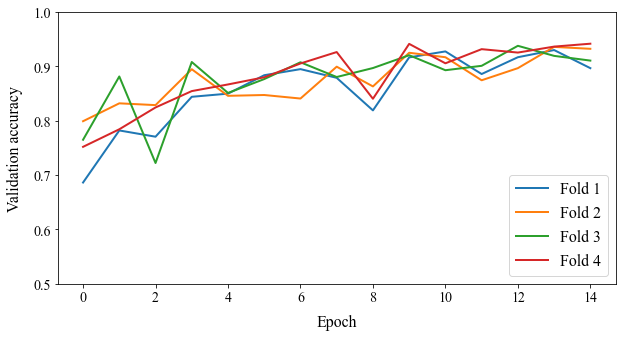

In [15]:
history_dict = pickle.load(open(os.path.join(ROOT_PATH, 'models/CNN/cross-validation/covidnet/covidnet-preprocessor-Adam_0.0001-random-history'), "rb"))
plt.figure(figsize=(10,5))
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4']
for h in history_dict:
    plt.plot(h["val_binary_accuracy"], linewidth=2, label=labels[history_dict.index(h)])
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('Epoch', fontsize=16, labelpad=10)
    plt.ylabel('Validation accuracy', fontsize=16, labelpad=10)
    plt.ylim(0.5, 1)

plt.legend(loc='lower right', fontsize=16)
plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/covidnet_crossval.pdf')), bbox_inches='tight', format='pdf')

## Cross-validation Progress of BaseNet

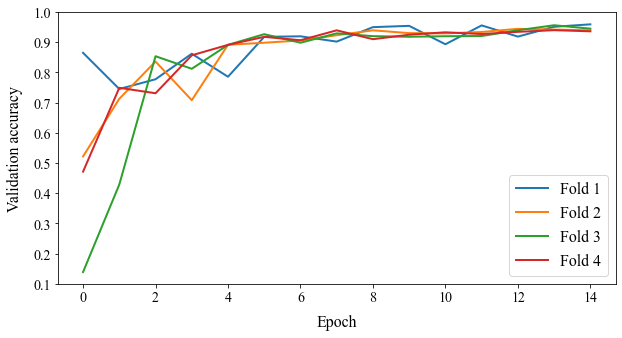

In [16]:
history_dict = pickle.load(open(os.path.join(ROOT_PATH, 'models/CNN/cross-validation/basenet/basenet-preprocessor-Adam_0.0001-random-history'), "rb"))
plt.figure(figsize=(10,5))
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4']
for h in history_dict:
    plt.plot(h["val_binary_accuracy"], linewidth=2, label=labels[history_dict.index(h)])
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('Epoch', fontsize=16, labelpad=10)
    plt.ylabel('Validation accuracy', fontsize=16, labelpad=10)
    plt.ylim(0.1, 1)

plt.legend(loc='lower right', fontsize=16)
plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/basenet_crossval.pdf')), bbox_inches='tight', format='pdf')

## Activation Functions

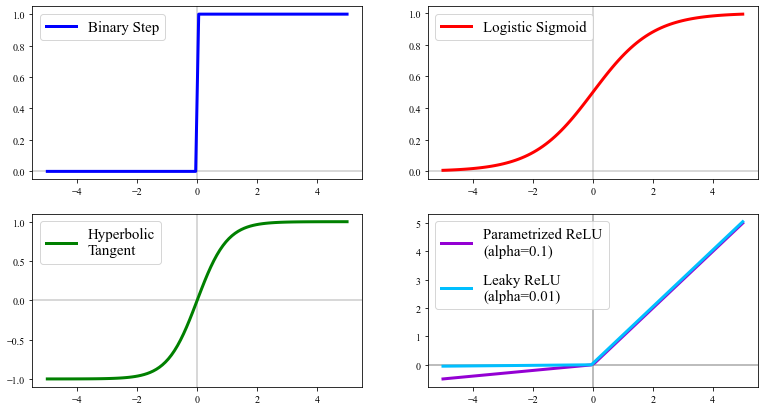

In [17]:
x = np.linspace(-5, 5, 100)

sigmoid = 1/(1 + math.e**(-x))
tanh = (math.e**(x) - math.e**(-x))/(math.e**(x) + math.e**(-x))
binary_step = np.vectorize(lambda i: 1 if i >= 0 else 0, otypes=[np.float])
relu = np.vectorize(lambda i, a, visual_shift: i + visual_shift if i >= 0 else a * i , otypes=[np.float])

fig, axs = plt.subplots(2, 2, figsize=(13,7))

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

axs[0, 0].axhline(y=0, color='gray', alpha=0.4)
axs[0, 0].axvline(x=0, color='gray', alpha=0.4)
axs[0, 0].plot(x, binary_step(x), 'blue', linewidth=3, label='Binary Step')
axs[0, 0].legend(loc='upper left', fontsize=15)

axs[0, 1].axhline(y=0, color='gray', alpha=0.4)
axs[0, 1].axvline(x=0, color='gray', alpha=0.4)
axs[0, 1].plot(x, sigmoid, 'r', linewidth=3, label='Logistic Sigmoid')
axs[0, 1].legend(loc='upper left', fontsize=15)

axs[1, 0].axhline(y=0, color='gray', alpha=0.4)
axs[1, 0].axvline(x=0, color='gray', alpha=0.4)
axs[1, 0].plot(x, tanh, 'g', linewidth=3, label='Hyperbolic\nTangent')
axs[1, 0].legend(loc='upper left', fontsize=15)

axs[1, 1].axhline(y=0, color='gray', alpha=0.4)
axs[1, 1].axvline(x=0, color='gray', alpha=0.4)
axs[1, 1].plot(x, relu(x, 0.1, 0), 'darkviolet', linewidth=3, label='Parametrized ReLU\n(alpha=0.1)')

axs[1, 1].axhline(y=0, color='gray', alpha=0.4)
axs[1, 1].axvline(x=0, color='gray', alpha=0.4)
axs[1, 1].plot(x, relu(x, 0.01, 0.05), 'deepskyblue', linewidth=3, label='Leaky ReLU\n(alpha=0.01)')
axs[1, 1].legend(loc='upper left', fontsize=15, labelspacing=1)

plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/activation_functions.pdf')), bbox_inches='tight', format='pdf')

## CXR Examples

(2000, 681, 3)


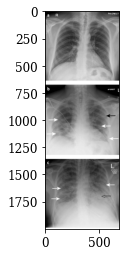

In [ ]:
# requires loading a saved image from one of the research publications into the Colab session (function only available to the author, please do not re-run)
img = cv2.imread('./cxr.jpg')
plt.imshow(img)
print(img.shape)

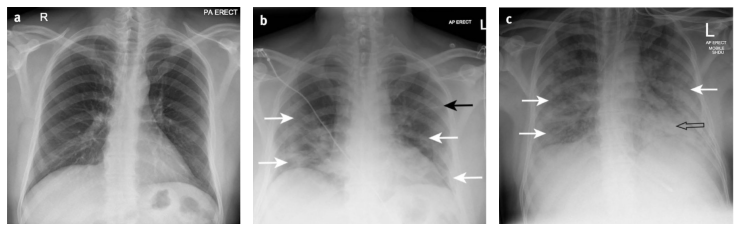

In [ ]:
img1 = img[6:638,:]
img2 = img[673:1305,:]
img3 = img[1353:1985,:]

fig, axs = plt.subplots(1, 3, figsize=(13,7))
fig.subplots_adjust(hspace=0, wspace=0.05)

axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(img3)

[axi.set_axis_off() for axi in axs.ravel()]

plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/cxr.jpg')), bbox_inches='tight', format='jpg')

## CNN Architecture Diagrams

In [21]:
basenet = load_model(os.path.join(ROOT_PATH, 'models/CNN/cross-validation/basenet/basenet-preprocessor-Adam_0.0001-random--1.h5'))

In [22]:
basenet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 4864        input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 64) 102464      conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

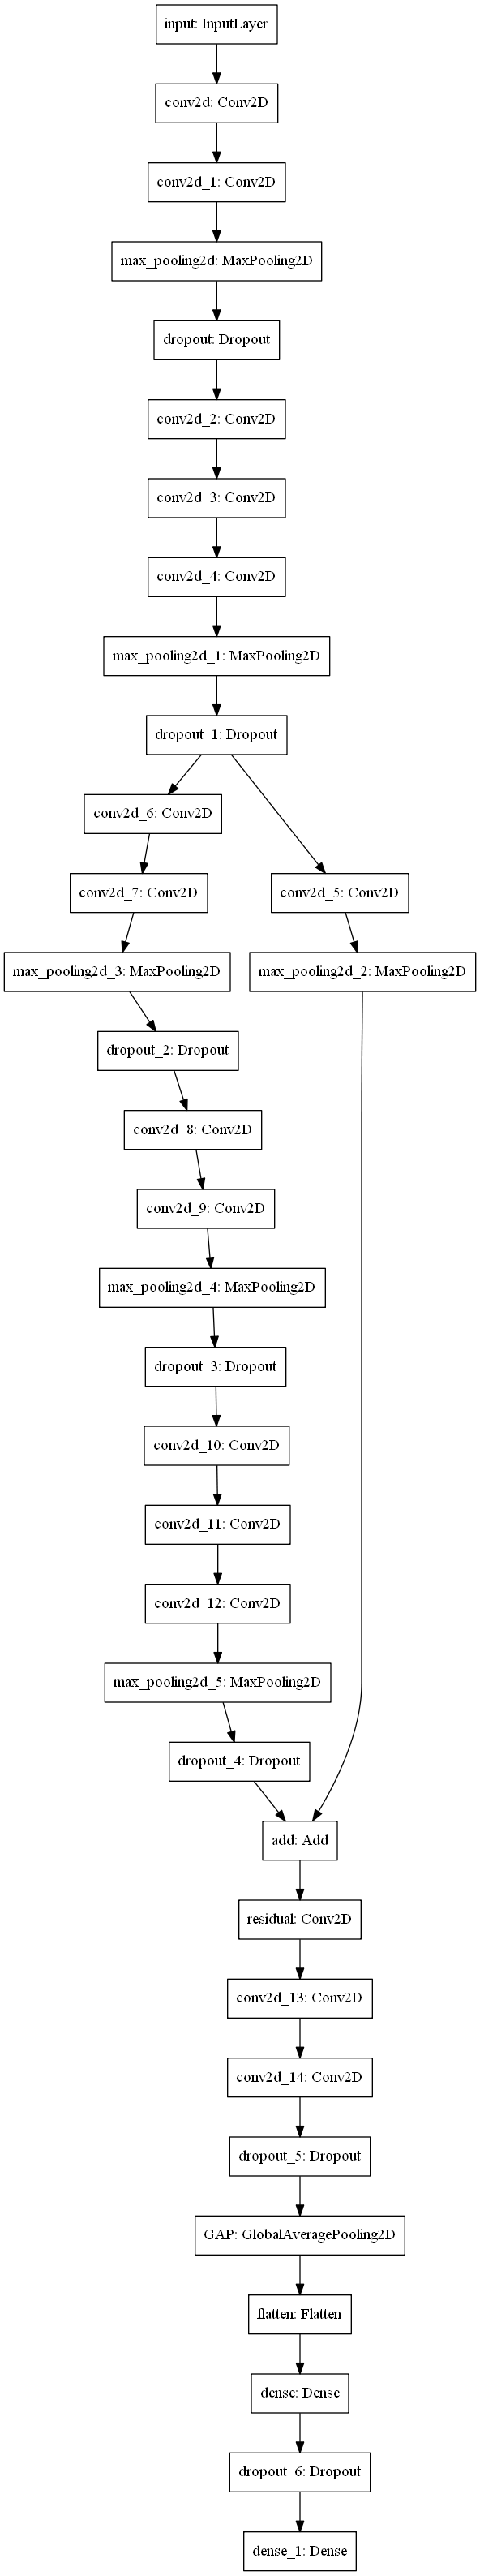

In [23]:
plot_model(basenet)

## Recreation of the graph from "*A Deep Convolutional Neural Network for COVID-19 Detection Using Chest X-rays*"
* Original source: https://arxiv.org/abs/2005.01578.
* Figure in original paper has bad quality, so we recreated it here.

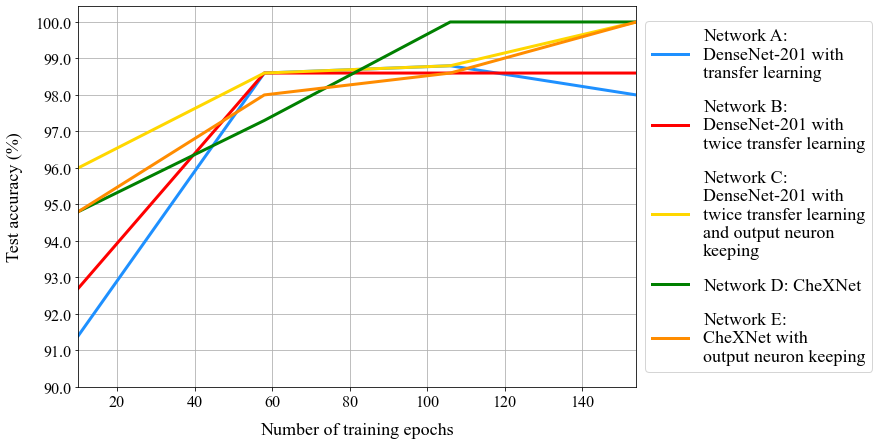

In [24]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.figure(figsize=(10,7))
axes = plt.gca()

plt.plot([10, 58, 106, 154], [91.4, 98.6, 98.8, 98.0], linewidth=3, color='dodgerblue', label='Network A:\nDenseNet-201 with\ntransfer learning')
plt.plot([10, 58, 106, 154], [92.7, 98.6, 98.6, 98.6], linewidth=3, color='red', label='Network B:\nDenseNet-201 with\ntwice transfer learning')
plt.plot([10, 58, 106, 154], [96.0, 98.6, 98.8, 100.0], linewidth=3, color='gold', label='Network C:\nDenseNet-201 with\ntwice transfer learning\nand output neuron\nkeeping')
plt.plot([10, 58, 106, 154], [94.8, 97.3, 100.0, 100.0], linewidth=3, color='green', label='Network D: CheXNet')
plt.plot([10, 58, 106, 154], [94.8, 98.0, 98.6, 100.0], linewidth=3, color='darkorange', label='Network E:\nCheXNet with\noutput neuron keeping')

plt.tick_params(axis='both', labelsize=16)
plt.xlim(10, 154)
plt.xlabel('Number of training epochs', fontsize=18, labelpad=12)

axes.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
axes.yaxis.set_ticks(np.arange(90.0, 101, 1))
plt.ylabel('Test accuracy (%)', fontsize=18, labelpad=12)

#plt.title('Test accuracy during training on COVID-19 dataset', fontsize=22, pad=20)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18, labelspacing=1)

plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/graph_recreation.pdf')), bbox_inches='tight', format='pdf')

## Optimizer Grid Search

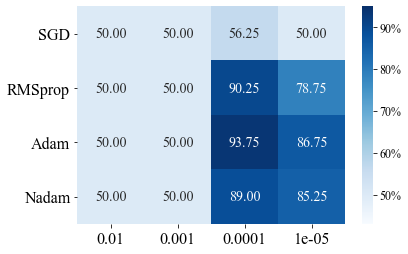

In [26]:
test = pd.DataFrame([[0.5, 0.5, 0.5625, 0.5], [0.5, 0.5, 0.9025, 0.7875], [0.5, 0.5, 0.9375, 0.8675], [0.5, 0.5, 0.89, 0.8525]], 
                    ['SGD', 'RMSprop', 'Adam', 'Nadam'], 
                    [0.01, 0.001, 0.0001, 0.00001]) * 100

fmt = lambda x,pos: '{:.0f}%'.format(x)
sns.heatmap(test, annot=True, cmap='Blues', fmt='.2f', vmin=43, vmax=95, annot_kws={'size': 14}, cbar_kws={'format': matplotlib.ticker.FuncFormatter(fmt)})
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/optimizers_test.pdf')), bbox_inches='tight', format='pdf')

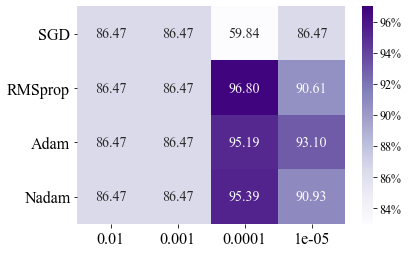

In [27]:
train = pd.DataFrame([[0.8647, 0.8647, 0.5984, 0.8647], [0.8647, 0.8647, 0.968, 0.9061], [0.8647, 0.8647, 0.9519, 0.931], [0.8647, 0.8647, 0.9539, 0.9093]], 
                     ['SGD', 'RMSprop', 'Adam', 'Nadam'], 
                     [0.01, 0.001, 0.0001, 0.00001]) * 100

fmt = lambda x,pos: '{:.0f}%'.format(x)
sns.heatmap(train, annot=True, cmap='Purples', fmt='.2f', vmin=83, vmax=97, annot_kws={'size': 14}, cbar_kws={'format': matplotlib.ticker.FuncFormatter(fmt)})
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()
#plt.savefig(os.path.abspath(os.path.join(ROOT_PATH, 'diagrams/optimizers_train.pdf')), bbox_inches='tight', format='pdf')